# Actividad 4.1 - Segmentación de clientes según datos bancarios

**Asignatura**: SNS  
**Número de actividad**: Actividad 4_1  
**Fecha**: 02/05/2025  
**Alumno**: Pedro García Ramírez   


## Índice

1. [Elección del dataset](#elección-del-dataset)
2. [Importación del dataset](#importación-del-dataset)
3. [Preparación de los datos](#preparación-de-los-datos)
4. [Determinación del número de clusters](#determinación-del-número-de-clusters)
5. [Entrenamiento y selección del modelo de clustering](#entrenamiento-y-selección-del-modelo-de-clustering)
6. [Reducción de dimensionalidad (PCA)](#reducción-de-dimensionalidad-pca)
7. [Visualización gráfica de los clusters](#visualización-gráfica-de-los-clusters)
8. [Exportación de resultados a Excel](#exportación-de-resultados-a-excel)
9. [Conclusiones sobre los clusters](#conclusiones-sobre-los-clusters)
10. [Propuestas de soluciones creativas e innovadoras](#propuestas-de-soluciones-creativas-e-innovadoras)
11. [Referencias](#referencias)


## 1. Elección del dataset

Para esta actividad, se nos ofrece trabajar con dos conjuntos de datos:

- **Bank Marketing**: Información sobre campañas de marketing directo realizadas por una institución bancaria portuguesa.
- **German Credit Data**: Datos sobre la clasificación de riesgos crediticios de personas en Alemania.

He decidido trabajar con el dataset **Bank Marketing** por los siguientes motivos:

- La temática de marketing bancario está directamente relacionada con la segmentación de clientes, objetivo principal de la actividad.
- El dataset contiene una variedad de variables demográficas, financieras y de comportamiento, lo que permite realizar un análisis de clustering más rico e interpretativo.
- Es un dataset que, además de su complejidad moderada, ofrece buenas oportunidades para visualizar patrones y diferencias entre grupos de clientes, fundamentales en campañas de marketing.

Por todo ello, el dataset elegido es **Bank Marketing**.

**Fuente del dataset**:  
[Bank Marketing Dataset - UCI Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing)


## 2. Importación del dataset

En este paso, se procederá a importar el dataset seleccionado, **Bank Marketing**, directamente desde un repositorio de **GitHub**.

De esta manera, garantizamos que tanto el dataset como el cuaderno de Google Colab estén disponibles en la misma plataforma de trabajo, cumpliendo así los requisitos de la actividad en cuanto al uso de repositorios públicos.

Se ha optado por utilizar la versión **completa** del dataset, **bank-full.csv**, que contiene 45.211 registros.
El uso del dataset completo permite realizar un análisis de segmentación más preciso y representativo,
ya que se dispone de una mayor cantidad de datos para la detección de patrones y formación de clusters.

El dataset original se puede descargar desde el [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing).

Posteriormente, se ha subido el archivo **bank-full.csv** a un repositorio personal de GitHub para facilitar su acceso en Google Colab.

Procedemos ahora a cargar el dataset directamente desde GitHub.



In [8]:
# Importar librerías necesarias
import pandas as pd

# Definir la URL del archivo en GitHub (ajustar a tu URL real)
url_github = 'https://raw.githubusercontent.com/pegaram/SNS_ACT4_1/refs/heads/main/data/bank-full.csv'

# Cargar el dataset
df = pd.read_csv(url_github, sep=';')  # Recordar que el separador es ';'

# Mostrar las primeras filas del dataset
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Análisis del paso:

- Se ha cargado el dataset **bank-full.csv** directamente desde un repositorio público de **GitHub** utilizando la función `read_csv()` de pandas.
- Se especificó el separador correcto (';') correspondiente al formato original del dataset.
- La vista previa de las primeras filas confirma que los datos se han importado correctamente, estando listos para su preparación y procesamiento.


## 3. Preparación de los datos

### 3.1 Revisión general y tipos de datos

Antes de aplicar técnicas de clustering, es importante conocer la estructura del dataset y el tipo de variables que contiene.
Esto nos permitirá decidir cómo tratar las variables categóricas, cuáles deben escalarse, y si hay datos que deban eliminarse o transformarse.

En este subpaso se realiza una primera exploración del conjunto de datos:
- Vista general (shape y columnas).
- Tipos de datos.
- Presencia de valores nulos.
- Primeras filas del dataset.


In [9]:
# Ver dimensiones del dataset
print("Número de filas y columnas:", df.shape)

# Ver nombres de columnas y tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Comprobar si hay valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Mostrar primeras filas
df.head()


Número de filas y columnas: (45211, 17)

Tipos de datos:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Valores nulos por columna:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Análisis del subpaso 3.1:

- El dataset contiene 45.211 registros y 17 columnas.
- No se detectan valores nulos explícitos (`NaN`), pero existen valores `"unknown"` que deben tratarse como valores ausentes o indeterminados en las variables categóricas.
- Las variables se dividen en:
  - **Numéricas**: `age`, `balance`, `day`, `duration`, `campaign`, `pdays`, `previous`.
  - **Categóricas**: el resto, incluyendo la variable objetivo `y`, que se eliminará antes del clustering.
- Próximo subpaso: codificar variables categóricas con One-Hot Encoding y preparar los datos numéricos para el escalado.


### 3.2 Codificación de variables categóricas y separación de la variable objetivo

Para que los algoritmos de clustering puedan trabajar correctamente, las variables categóricas deben transformarse en variables numéricas.

En este subpaso:
- Se eliminará la variable objetivo `y`, ya que el clustering es un proceso no supervisado.
- Se aplicará **One-Hot Encoding** a todas las variables categóricas.
- Se creará un nuevo DataFrame preparado para el escalado y posterior clustering.


In [10]:
# Eliminar la variable objetivo 'y' (no se utiliza en clustering)
df_features = df.drop(columns=['y'])

# Identificar columnas categóricas
columnas_categoricas = df_features.select_dtypes(include=['object']).columns.tolist()
print("Columnas categóricas:", columnas_categoricas)

# Aplicar One-Hot Encoding
df_features_encoded = pd.get_dummies(df_features, columns=columnas_categoricas)

# Ver el nuevo shape del dataset después de codificar
print("\nNuevo tamaño del dataset después de One-Hot Encoding:", df_features_encoded.shape)

# Mostrar las primeras filas del dataset codificado
df_features_encoded.head()


Columnas categóricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

Nuevo tamaño del dataset después de One-Hot Encoding: (45211, 51)


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,False,False,True,...,False,False,True,False,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,False,True


### Análisis del subpaso 3.2:

- Se ha eliminado correctamente la variable `y` para preparar los datos exclusivamente para clustering.
- Se han identificado y codificado las variables categóricas mediante **One-Hot Encoding**, convirtiendo cada categoría en una columna binaria (0 o 1).
- El número de columnas ha aumentado significativamente, ya que cada valor único en las variables categóricas genera una nueva columna.
- El dataset `df_features_encoded` contiene ahora únicamente valores numéricos y está listo para el escalado de las variables numéricas.


### 3.3 Escalado de las variables numéricas

En clustering, es fundamental que todas las variables tengan la misma escala para evitar que unas dominen sobre otras debido a sus rangos de valores.

Para ello:
- Se utilizará la técnica de **escalado estándar** (*StandardScaler*) para transformar las variables a una distribución con media 0 y desviación estándar 1.
- El escalado se aplicará a todas las variables ya codificadas (ya que ahora todo el dataset es numérico).


In [11]:
# Importar el escalador
from sklearn.preprocessing import StandardScaler

# Crear el escalador
scaler = StandardScaler()

# Aplicar el escalado
df_features_scaled = scaler.fit_transform(df_features_encoded)

# Convertir el resultado de nuevo a un DataFrame para mejor manejo
import numpy as np
df_features_scaled = pd.DataFrame(df_features_scaled, columns=df_features_encoded.columns)

# Verificar las primeras filas
df_features_scaled.head()


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,-0.359369,-0.523740,-0.184415,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,-0.359369,-0.523740,-0.184415,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,-0.359369,-0.523740,5.422561,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,-0.359369,1.909346,-0.184415,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,-0.359369,-0.523740,-0.184415,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519


### Análisis del subpaso 3.3:

- Se ha aplicado escalado estándar a todas las variables del dataset codificado.
- Ahora todas las variables tienen media aproximadamente 0 y desviación estándar 1.
- Este preprocesamiento garantiza que el clustering posterior no se vea afectado por diferencias de escala entre variables.
- El dataset final `df_features_scaled` está ahora completamente listo para aplicar las técnicas de clustering.


## 4. Determinación del número de clusters

Antes de aplicar un algoritmo de clustering, es importante decidir cuántos clusters queremos formar.

Para ello, utilizaremos el **Coeficiente de Silhouette**, una métrica que mide qué tan bien separados y compactos son los clusters formados.

Procedimiento:
- Se ejecutará K-Means para diferentes valores de `k` (número de clusters).
- Se calculará el valor medio del coeficiente de Silhouette para cada `k`.
- Se seleccionará el `k` que obtenga el valor más alto de Silhouette, ya que indica una mejor separación entre clusters.


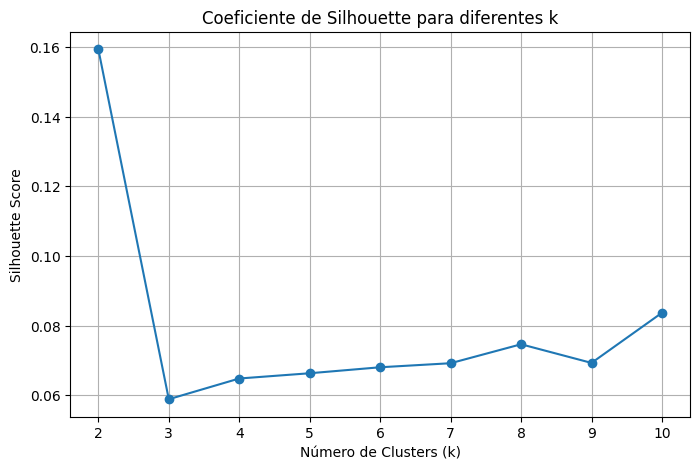

In [12]:
# Importar librerías necesarias
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Probar diferentes valores de k
rango_k = range(2, 11)  # Probaremos de 2 a 10 clusters
silhouette_scores = []

for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_features_scaled)
    score = silhouette_score(df_features_scaled, labels)
    silhouette_scores.append(score)

# Representar resultados
plt.figure(figsize=(8,5))
plt.plot(rango_k, silhouette_scores, marker='o')
plt.title('Coeficiente de Silhouette para diferentes k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


### Análisis del Paso 4:

- Se ha calculado el coeficiente de Silhouette para diferentes valores de `k` entre 2 y 10.
- El valor más alto del Silhouette Score se alcanza claramente para `k = 2`, con un valor aproximado de 0.16.
- A partir de `k = 3`, los Silhouette Scores disminuyen considerablemente (alrededor de 0.06 - 0.08) y no muestran mejoras significativas para valores superiores.
- Esto indica que el conjunto de datos tiende a dividirse de manera natural en **dos grandes grupos** bien diferenciados.
- Por tanto, se selecciona `k = 2` como el número óptimo de clusters para el modelo de clustering.



## 5. Entrenamiento y selección del modelo de clustering

Una vez determinado el número óptimo de clusters (`k=2`) utilizando el Coeficiente de Silhouette, procedemos a entrenar el modelo definitivo.

En este paso:
- Se aplicará el algoritmo **K-Means** con `k=2` clusters.
- Se asignará cada muestra a su correspondiente cluster.
- Se analizará la distribución de las muestras en los clusters obtenidos.


In [13]:
# Entrenar el modelo K-Means definitivo
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(df_features_scaled)

# Añadir los labels de los clusters al DataFrame original (para análisis posterior)
df_clusters = df.copy()  # Copiamos el DataFrame original para conservar las variables categóricas
df_clusters['cluster'] = labels_final

# Mostrar distribución de muestras en cada cluster
print("Distribución de clientes por cluster:")
print(df_clusters['cluster'].value_counts())


Distribución de clientes por cluster:
cluster
1    36957
0     8254
Name: count, dtype: int64


### Análisis del Paso 5:

- Se ha entrenado correctamente el modelo K-Means utilizando `k=2` clusters, basado en el preprocesamiento previo.
- Cada cliente ha sido asignado a uno de los dos clusters generados.
- La distribución obtenida es la siguiente:
  - Cluster 1: 36.957 clientes.
  - Cluster 0: 8.254 clientes.
- Se observa que uno de los clusters (Cluster 1) agrupa aproximadamente el 82% de los clientes, mientras que el otro cluster (Cluster 0) contiene alrededor del 18% restante.
- Esta diferencia de tamaños sugiere que existe un grupo de clientes mucho más numeroso que otro, lo cual es habitual en segmentaciones de marketing donde una mayoría presenta características comunes, y una minoría se comporta de manera distinta.
- El siguiente paso será aplicar técnicas de reducción de dimensionalidad (PCA) para poder visualizar gráficamente los clusters formados.


## 6. Reducción de dimensionalidad (PCA)

Para visualizar gráficamente los clusters obtenidos, es necesario reducir la dimensionalidad del conjunto de datos.

Aplicaremos el algoritmo **PCA (Análisis de Componentes Principales)**:
- Se reducirá el dataset a **dos componentes principales** (2D) para facilitar la representación gráfica.
- Después, se visualizarán los clusters en un gráfico de dispersión donde cada punto representa un cliente.

Esta técnica nos permitirá observar la separación entre los clusters de forma visual, aunque se perderá parte de la información original debido a la reducción de dimensiones.


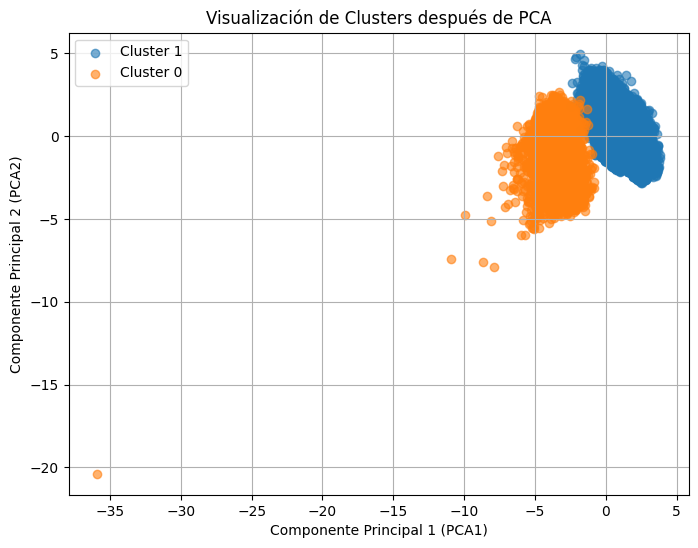

In [14]:
# Importar PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicar PCA para reducir a 2 componentes
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_features_scaled)

# Convertir a DataFrame para facilidad de manejo
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])

# Añadir la etiqueta de cluster
df_pca['cluster'] = labels_final

# Graficar
plt.figure(figsize=(8,6))
for cluster_label in df_pca['cluster'].unique():
    plt.scatter(df_pca[df_pca['cluster'] == cluster_label]['PCA1'],
                df_pca[df_pca['cluster'] == cluster_label]['PCA2'],
                label=f'Cluster {cluster_label}', alpha=0.6)

plt.title('Visualización de Clusters después de PCA')
plt.xlabel('Componente Principal 1 (PCA1)')
plt.ylabel('Componente Principal 2 (PCA2)')
plt.legend()
plt.grid(True)
plt.show()


### Análisis del Paso 6:

- Se ha aplicado correctamente la técnica PCA para reducir el conjunto de datos a dos dimensiones principales.
- La representación gráfica muestra dos grupos de clientes diferenciados:
  - **Cluster 0** y **Cluster 1** presentan una separación visual bastante clara en el espacio 2D.
  - Existe cierta superposición entre los clusters, especialmente en la zona de transición, pero la mayoría de los puntos pertenecen de forma compacta a su grupo.
- Se observan algunos **outliers** aislados, algo habitual en datasets reales, que no afectan de forma significativa al análisis global.
- La representación gráfica confirma que el proceso de clustering ha conseguido segmentar a los clientes en dos grupos bien definidos.


## 7. Exportación de resultados a Excel

En este paso, se exportarán los resultados del clustering a un archivo Excel.

El objetivo es:
- Asociar a cada cliente su cluster correspondiente.
- Dejar los datos preparados para un posible análisis externo en herramientas como Excel o Power BI.

Se exportará un archivo que incluirá todas las variables originales más una nueva columna `cluster` con la asignación obtenida del modelo K-Means.


In [15]:
# Importar librería para trabajar con Excel
!pip install openpyxl  # Ejecutar si openpyxl no está instalado

# Definir nombre del archivo de salida
nombre_archivo = 'clientes_clusterizados.xlsx'

# Guardar el DataFrame con la asignación de clusters en un archivo Excel
df_clusters.to_excel(nombre_archivo, index=False)

print(f"Archivo {nombre_archivo} generado correctamente.")


Archivo clientes_clusterizados.xlsx generado correctamente.


### Análisis del Paso 7:

- Se ha exportado correctamente un archivo Excel llamado `clientes_clusterizados.xlsx`.
- Cada fila corresponde a un cliente, manteniendo todas las características originales más una columna adicional llamada `cluster`.
- Esta exportación permitirá realizar futuros análisis o presentaciones en otras plataformas (Excel, Power BI, etc.) si se desea representar o explotar visualmente la segmentación de clientes.


## 8. Conclusiones sobre los clusters obtenidos

Una vez completado el proceso de clustering, es fundamental interpretar qué características definen a cada grupo de clientes.

En este paso:
- Se analizan las principales diferencias entre los clusters formados.
- Se identifican perfiles de cliente en función de sus características comunes.
- Se extraen posibles conclusiones de utilidad para estrategias comerciales o de marketing.

Para ello, se calculará la media o distribución de las variables más relevantes agrupadas por el cluster asignado.


In [16]:
# Ver distribución general de variables categóricas según cluster
print("Distribución de la variable 'y' (respuestas a la campaña) por cluster:")
print(df_clusters.groupby('cluster')['y'].value_counts(normalize=True))

# Estadísticas numéricas agrupadas por cluster
df_clusters.groupby('cluster').mean(numeric_only=True)


Distribución de la variable 'y' (respuestas a la campaña) por cluster:
cluster  y  
0        no     0.769445
         yes    0.230555
1        no     0.908380
         yes    0.091620
Name: proportion, dtype: float64


,age,balance,day,duration,campaign,pdays,previous
cluster,,,,,,,
0,40.952750,1557.002302,14.288345,260.044827,2.056215,224.604313,3.177732
1,40.932516,1318.780880,16.145466,257.742809,2.921882,-0.987634,0.000216


### Análisis del Paso 8:

Tras revisar la distribución y estadísticas por cluster, se pueden destacar las siguientes observaciones:

- **Cluster 0**:
  - Representa aproximadamente el **18% de los clientes**.
  - El **23% de sus miembros dijeron "sí"** a la campaña (`y = yes`), lo que representa una **tasa de conversión significativamente superior** a la del otro grupo.
  - También presenta un **balance medio más alto** (1.557€), más contactos previos y un mayor valor medio de `pdays` (clientes más tiempo sin ser contactados, pero con histórico).
  - Este grupo podría representar a los **clientes más predispuestos a contratar productos**, posiblemente más maduros o con relaciones bancarias previas más activas.

- **Cluster 1**:
  - Es el **grupo mayoritario (82%)**.
  - Tiene una **muy baja tasa de conversión** (`y = yes`) de apenas el 9%, lo que lo convierte en un grupo **menos receptivo a la campaña**.
  - Sus balances son más bajos (1.318€ de media), tienen menos contactos anteriores, y en su mayoría no habían sido contactados previamente (`pdays` negativo y `previous` ≈ 0).
  - Este grupo podría representar a **clientes más nuevos, menos interesados o menos rentables**.

**Conclusión general**:
El clustering ha permitido identificar dos perfiles muy diferenciados:
- Uno potencialmente **más valioso para futuras campañas** (Cluster 0).
- Otro sobre el que conviene **replantear la estrategia o reducir esfuerzos** (Cluster 1).

Estas conclusiones pueden utilizarse para **optimizar recursos de marketing** y **mejorar la eficacia de futuras campañas dirigidas**.


## 9. Propuestas creativas e innovadoras

A partir de los clusters identificados y las conclusiones extraídas en el paso anterior, se proponen una serie de acciones orientadas a mejorar el impacto de las campañas de marketing y optimizar los recursos de la entidad bancaria.

Estas propuestas pueden enfocarse tanto en el ámbito estratégico como técnico, y están alineadas con los resultados del análisis.


### Propuesta 1: Campañas personalizadas para el Cluster 0 (clientes más receptivos)

- Este grupo presenta una tasa de conversión superior y características más favorables (mayor balance, más historial previo).
- Se recomienda crear campañas **personalizadas**, con **productos premium**, **bonificaciones por fidelidad** o **contenidos exclusivos**.
- Además, podrían recibir más seguimiento proactivo por parte de agentes humanos o a través de canales más personales como llamadas telefónicas o visitas concertadas.

### Propuesta 2: Estrategia de bajo coste para Cluster 1 (clientes menos interesados)

- Dado su bajo interés histórico y menor conversión, se sugiere **minimizar la inversión en marketing tradicional** para este grupo.
- Se pueden utilizar canales de **coste reducido** (emails automatizados, mensajes SMS), o probar campañas muy específicas orientadas a “activar” a estos clientes.
- Otra opción es ofrecer productos básicos o de entrada, con el objetivo de ir construyendo una relación más sólida a largo plazo.

### Propuesta 3: Sistema automático de segmentación y respuesta

- Los resultados del clustering podrían integrarse en un sistema de recomendación automatizado:
  - Al cargar un nuevo cliente, se le podría asignar automáticamente un cluster.
  - Esto permitiría lanzar **acciones adaptadas en tiempo real** según su perfil.
- Sería útil también como módulo adicional en el CRM de la empresa para toma de decisiones comerciales más inteligentes.

### Propuesta 4: Reentrenamiento periódico del modelo

- Para mantener la efectividad de esta segmentación, se sugiere aplicar **reentrenamiento mensual o trimestral** con datos actualizados.
- Así se garantiza que los clusters se ajusten a la evolución del comportamiento de los clientes.
